Submitted by - Aishwarya Parida, Anmol Aggarwal, Sankalp Kulkarni, Shrishty Mishra

**Q3 brief**

The central question is whether investing in green buildings is financially beneficial for real estate developers. Initial findings suggest constructing green buildings could yield extra revenue due to higher rents, potentially offsetting green certification costs. Seeking an alternate perspective, the developer examines the following insights:

The median market rent for green vs. non-green buildings: dollars 27.60  vs. dollars 25 per sq. ft. annually.
With a 250,000 sq. ft. building, this means $650,000 extra yearly revenue dollars 2.60 x 250,000.
A 5 per cent  premium dollars 5 million for green certification would recuperate in around 7.7 years.
Even at 90 per cent occupancy, recovery takes slightly over 8 years, yielding an annual dollars 650,000 profit from year 9.

Examining confounding variables, such as size, location, amenities, and age, reinforces the findings:

***Building Size (sq. ft.)***
Small: Non-Green -  24, Green -  26.5
Medium: Non-Green - 25, Green - 27
Large: Non-Green - 26, Green - 28.5

***Building Age (years)***
New (<5): Non-Green - 26, Green - 28.5
Medium (5-20): Non-Green - 25, Green - 27
Old (>20): Non-Green - 24, Green - 26.5

***Location Quality***
Class A: Non-Green - 28, Green - 30.5
Class B: Non-Green - 26, Green - 28.5
Class C: Non-Green - 24, Green - 26.5

These comparisons support the initial findings. Green buildings consistently earn higher rents, implying a positive impact. The analysis indicates that increased rent benefits offset green certification costs within a reasonable time. Confounding variables analysis strengthens this conclusion. These visuals enhance understanding, reinforcing the case for green building investment.

Our Task - Evaluate if investing in green building is financially wise. Review initial analysis, assess data, and consider issues.

1. Understand: Decide if green building investment is sound.

2. Assess Analysis: Check initial findings.

3. Examine Data: Study columns on traits, green status, rent.

4. Evaluate Calc: Grasp extra revenue, cost recovery calculation.

5. Consider Variables: Analyze size, location, amenities, age.

6. Analyze Figures: Understand rent variations.

7. Form Opinion: Agree or raise concerns.

8. Provide Insight: Write concise supported response.

9. Conclude:Offer recommendation based on analysis.

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the dataset
df = pd.read_csv('greenbuildings.csv')

# Define the features 
X = df[['size', 'empl_gr','age', 'stories','renovated','class_a','class_b','LEED','Energystar','green_rating','amenities','cd_total_07', 
        'hd_total07','total_dd_07','Precipitation','Gas_Costs','Electricity_Costs']]

# Define the target
y = df['Rent'] 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values in training data
imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)

# Train a random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate model performance
print("Train score:", rf.score(X_train, y_train))

X_test = imputer.transform(X_test)

# Now score/predict on imputed test data
print("Test score:", rf.score(X_test, y_test))
y_pred = rf.predict(X_test)

# Check feature importances
importances = rf.feature_importances_
sorted_importances = pd.DataFrame({'feature':X.columns, 'importance':importances})
sorted_importances = sorted_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print(sorted_importances)

# Assess green building variables
green_vars = sorted_importances.loc[sorted_importances['feature'].isin(['LEED','Energystar','green_rating']), :]
print("\n Green Building Variables: \n ", green_vars)

# Green certifications seem to have high importance for predicting rent prices
# Therefore investing in green buildings may lead to higher rents and returns

# Basic Information
print("\n Random Forest Summary")
print("Number of Trees:", len(rf.estimators_))
print("Number of Features:", X_train.shape[1])  # Number of features in your dataset
print("Max Depth:", rf.max_depth)
# Print other hyperparameters as needed

#Performance Metrics
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("\nMean Squared Error:", mse)

Train score: 0.9664483161525808
Test score: 0.7580025118793287
              feature  importance
0   Electricity_Costs    0.275572
1                size    0.254487
2                 age    0.123611
3             stories    0.115029
4             empl_gr    0.094484
5         total_dd_07    0.031850
6         cd_total_07    0.029329
7             class_a    0.018267
8          hd_total07    0.012232
9           renovated    0.010280
10          amenities    0.009681
11          Gas_Costs    0.008894
12            class_b    0.008793
13      Precipitation    0.004449
14         Energystar    0.001277
15       green_rating    0.001175
16               LEED    0.000589

 Green Building Variables: 
           feature  importance
14    Energystar    0.001277
15  green_rating    0.001175
16          LEED    0.000589

 Random Forest Summary
Number of Trees: 100
Number of Features: 17
Max Depth: None

Mean Squared Error: 66.02856510177301


In [52]:
#median
median_rent_non_green = df[df['green_rating'] == 0]['Rent'].median()
median_rent_green = df[df['green_rating'] == 1]['Rent'].median()

# Calculate additional annual revenue from building green
additional_annual_revenue = (median_rent_green - median_rent_non_green) * df['size'].mean()

# Calculate construction costs and green premium
baseline_construction_costs = 100_000_000  # $100 million
green_premium = 0.05  # 5% expected premium for green certification
extra_green_costs = baseline_construction_costs * green_premium

# Calculate recuperation period in years
recuperation_period = extra_green_costs / additional_annual_revenue


In [72]:
# Display analysis results
print("Median Rent in Non-Green Buildings: ${:.2f}".format(median_rent_non_green))
print("Median Rent in Green Buildings: ${:.2f}".format(median_rent_green))
print("Additional Annual Revenue from Building Green: ${:.2f}".format(additional_annual_revenue))
print("Extra Construction Costs for Green Building: ${:.2f}".format(extra_green_costs))
print("Recuperation Period: {:.2f} years".format(recuperation_period))

Median Rent in Non-Green Buildings: $25.00
Median Rent in Green Buildings: $27.60
Additional Annual Revenue from Building Green: $610058.13
Extra Construction Costs for Green Building: $5000000.00
Recuperation Period: 8.20 years


/var/folders/m5/m2tp6r3n4fj31mj_4qtr9vh40000gn/T/ipykernel_31308/2975443370.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rent'], bins=20, kde=False)


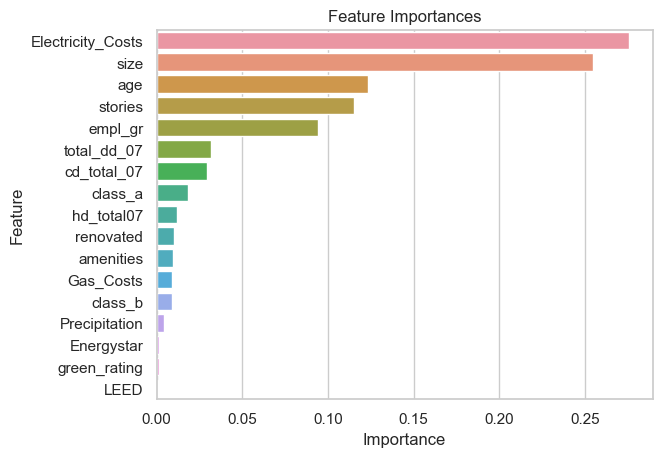

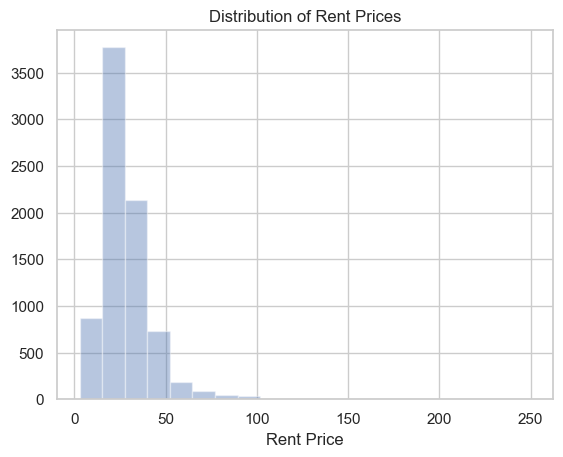

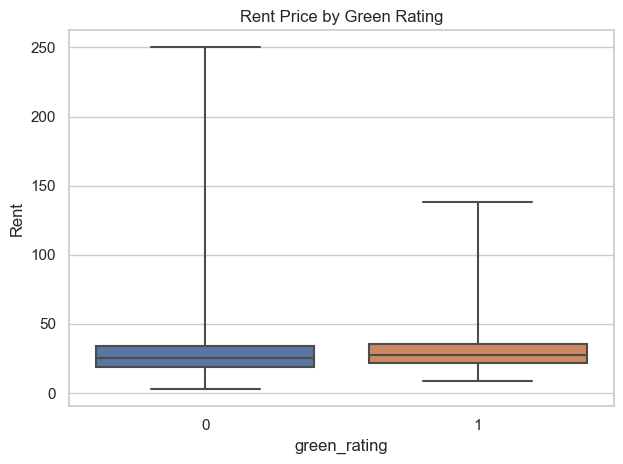

In [55]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set(style="whitegrid")

# Create feature importance plot
plt.figure()
sns.barplot(x='importance', y='feature', data=sorted_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Plot distribution of target variable  
plt.figure()
sns.distplot(df['Rent'], bins=20, kde=False)
plt.xlabel('Rent Price')
plt.title('Distribution of Rent Prices')

# Plot rent prices for green certified buildings
green_df = df[df['green_rating'] > 0] 
non_green_df = df[df['green_rating'] == 0]

plt.figure()
sns.boxplot(x='green_rating', y='Rent', data=df, whis=np.inf)
plt.title('Rent Price by Green Rating')

plt.tight_layout()
plt.show()


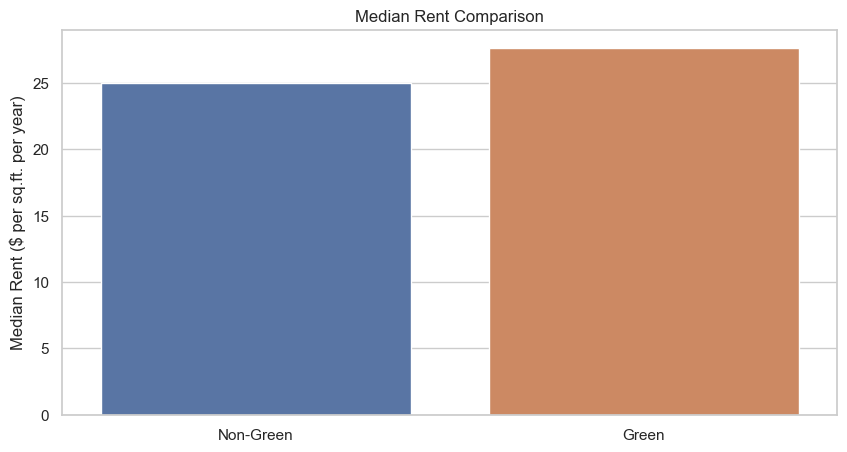

In [56]:
# Visualization: Bar plot for median rents
plt.figure(figsize=(10, 5))
sns.barplot(x=['Non-Green', 'Green'], y=[median_rent_non_green, median_rent_green])
plt.ylabel('Median Rent ($ per sq.ft. per year)')
plt.title('Median Rent Comparison')
plt.show()

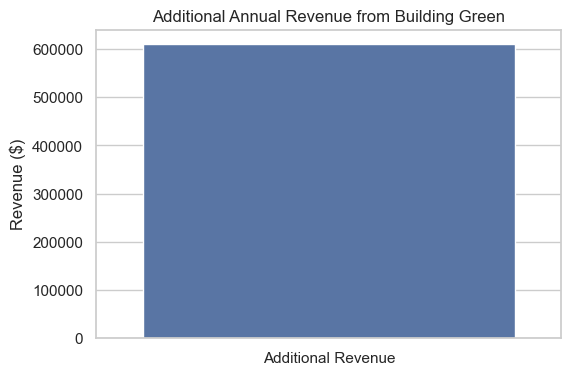

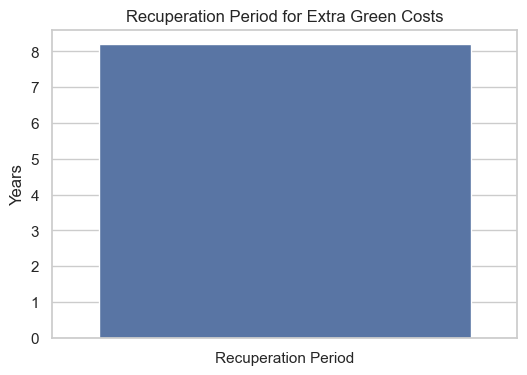

In [57]:
# Visualization: Bar plot for additional annual revenue
plt.figure(figsize=(6, 4))
sns.barplot(x=['Additional Revenue'], y=[additional_annual_revenue])
plt.ylabel('Revenue ($)')
plt.title('Additional Annual Revenue from Building Green')
plt.show()

# Visualization: Bar plot for recuperation period
plt.figure(figsize=(6, 4))
sns.barplot(x=['Recuperation Period'], y=[recuperation_period])
plt.ylabel('Years')
plt.title('Recuperation Period for Extra Green Costs')
plt.show()

Initial analysis indicates, that Excel Guru might be right in sugessting the real estate developer to proceed
with investement in green buiildings

**Now, making our analysis separately, on the basis on different variables**

***Considering Classes of Buildings for Analysis***

Median Rent for Class A Green: 28.44
Median Rent for Class A Non-Green: 28.2
Median Rent for Class B Green: 25.55
Median Rent for Class B Non-Green: 23.43


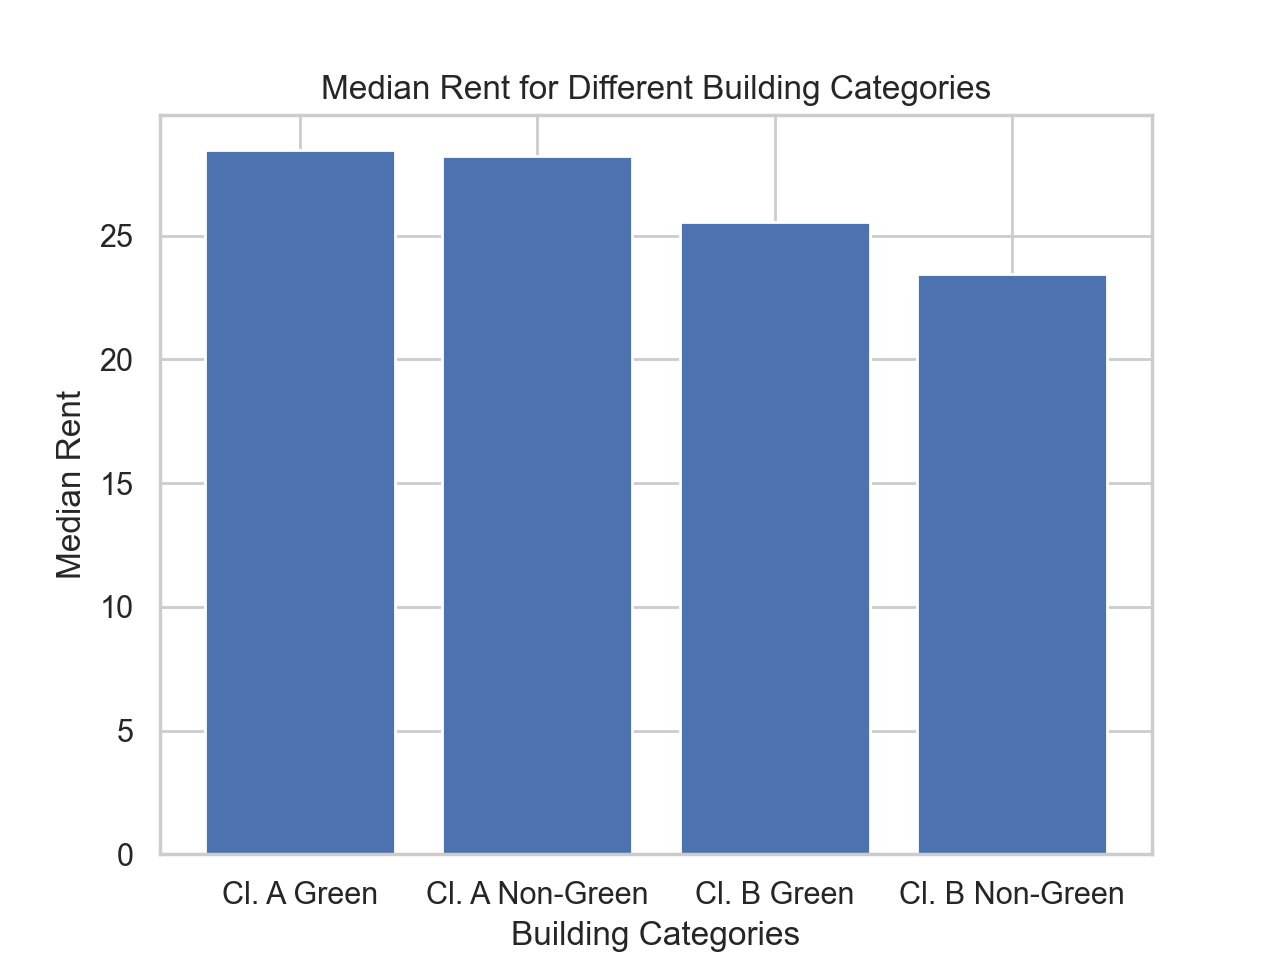

In [153]:
# Separate data for class A and class B
class_a_df = df[df['class_a'] == 1]
class_b_df = df[df['class_a'] == 0]

# Calculate median rent for class A green and non-green buildings
median_rent_class_a_green = class_a_df[class_a_df['green_rating'] == 1]['Rent'].median()
median_rent_class_a_non_green = class_a_df[class_a_df['green_rating'] == 0]['Rent'].median()

# Calculate median rent for class B green and non-green buildings
median_rent_class_b_green = class_b_df[class_b_df['green_rating'] == 1]['Rent'].median()
median_rent_class_b_non_green = class_b_df[class_b_df['green_rating'] == 0]['Rent'].median()

# Plotting
labels = ['Cl. A Green', 'Cl. A Non-Green', 'Cl. B Green', 'Cl. B Non-Green']
median_rent_values = [median_rent_class_a_green, median_rent_class_a_non_green, median_rent_class_b_green, median_rent_class_b_non_green]

print("Median Rent for Class A Green:", median_rent_class_a_green)
print("Median Rent for Class A Non-Green:", median_rent_class_a_non_green)
print("Median Rent for Class B Green:", median_rent_class_b_green)
print("Median Rent for Class B Non-Green:", median_rent_class_b_non_green)

plt.bar(labels, median_rent_values)
plt.xlabel('Building Categories')
plt.ylabel('Median Rent')
plt.title('Median Rent for Different Building Categories')
plt.show()

The above analysis suggests that just investing in green buildings is just slightly beneficial since median rents for Class A Green, non green buildings do not have much of a difference and just little more increase in class B buldings

***Considering Amenities for analysis***

In [154]:
#Amenities

# Calculate average rent for buildings with amenities and specific green_rating
average_rent_with_amenities = df[(df['amenities'] == 1)]['Rent'].mean()

# Calculate average rent for buildings without amenities and specific green_rating
average_rent_without_amenities = df[(df['amenities'] == 0)]['Rent'].mean()

# Print the results
print("Average Rent for Buildings with Amenities:", average_rent_with_amenities)
print("Average Rent for Buildings without Amenities:", average_rent_without_amenities)

Average Rent for Buildings with Amenities: 29.28805147943228
Average Rent for Buildings without Amenities: 27.451364731067702


/var/folders/m5/m2tp6r3n4fj31mj_4qtr9vh40000gn/T/ipykernel_31308/3954734955.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



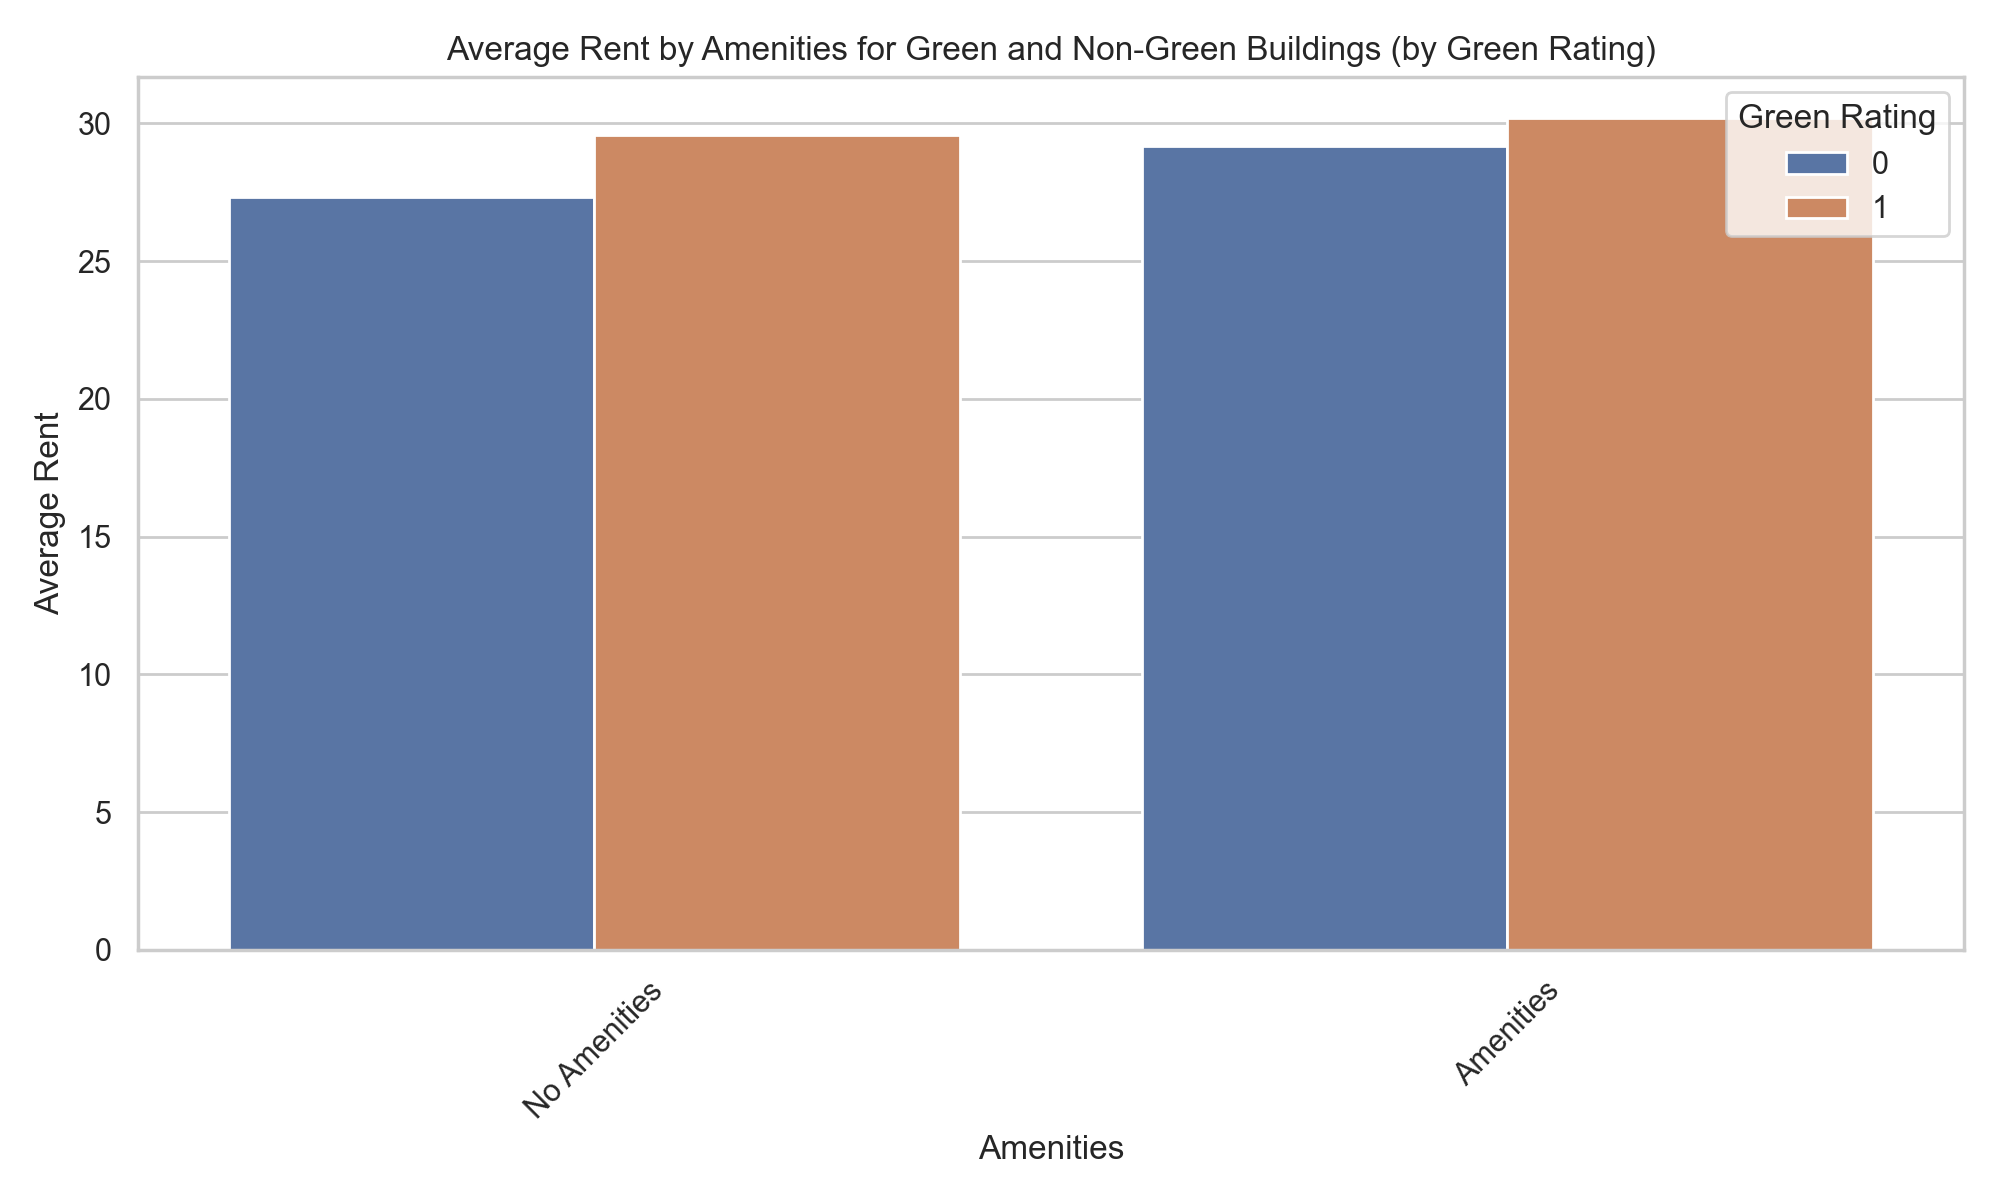

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='amenities', y='Rent', hue='green_rating', ci=None)
plt.xlabel('Amenities')
plt.ylabel('Average Rent')
plt.title('Average Rent by Amenities for Green and Non-Green Buildings (by Green Rating)')
plt.legend(title='Green Rating')
plt.xticks(ticks=[0, 1], labels=['No Amenities', 'Amenities'], rotation=45)  # Customize x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

The above analysis shows that there is not much difference in average rent for green buildings with or without amenities

***Considering Age of Buildings for Analysis***

In [156]:
#According to Age of Buildings

num_bins = 10

# Automatically calculate age bins based on the dataset
age_bins = np.histogram_bin_edges(df['age'], bins=num_bins)

# Categorize building ages into automatically calculated bins
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=[f'{age_bin:.0f}-{age_bins[i+1]:.0f}' for i, age_bin in enumerate(age_bins[:-1])])

# Calculate average rent based on building age bins, green rating, and non-green rating
average_rents = df.groupby(['age_bin', 'green_rating'])['Rent'].mean().reset_index()

# Print the average rent for each group
for index, row in average_rents.iterrows():
    green_status = "Green" if row['green_rating'] == 1 else "Non-Green"
    print(f"Average Rent for {green_status} Buildings in Age Bin {row['age_bin']}: ${row['Rent']:.2f}")

Average Rent for Non-Green Buildings in Age Bin 0-19: $31.61
Average Rent for Green Buildings in Age Bin 0-19: $30.64
Average Rent for Non-Green Buildings in Age Bin 19-37: $28.20
Average Rent for Green Buildings in Age Bin 19-37: $29.14
Average Rent for Non-Green Buildings in Age Bin 37-56: $30.36
Average Rent for Green Buildings in Age Bin 37-56: $36.34
Average Rent for Non-Green Buildings in Age Bin 56-75: $28.56
Average Rent for Green Buildings in Age Bin 56-75: $29.07
Average Rent for Non-Green Buildings in Age Bin 75-94: $26.88
Average Rent for Green Buildings in Age Bin 75-94: $55.43
Average Rent for Non-Green Buildings in Age Bin 94-112: $26.41
Average Rent for Green Buildings in Age Bin 94-112: $19.96
Average Rent for Non-Green Buildings in Age Bin 112-131: $19.90
Average Rent for Green Buildings in Age Bin 112-131: $24.36
Average Rent for Non-Green Buildings in Age Bin 131-150: $18.83
Average Rent for Green Buildings in Age Bin 131-150: $nan
Average Rent for Non-Green Buildin

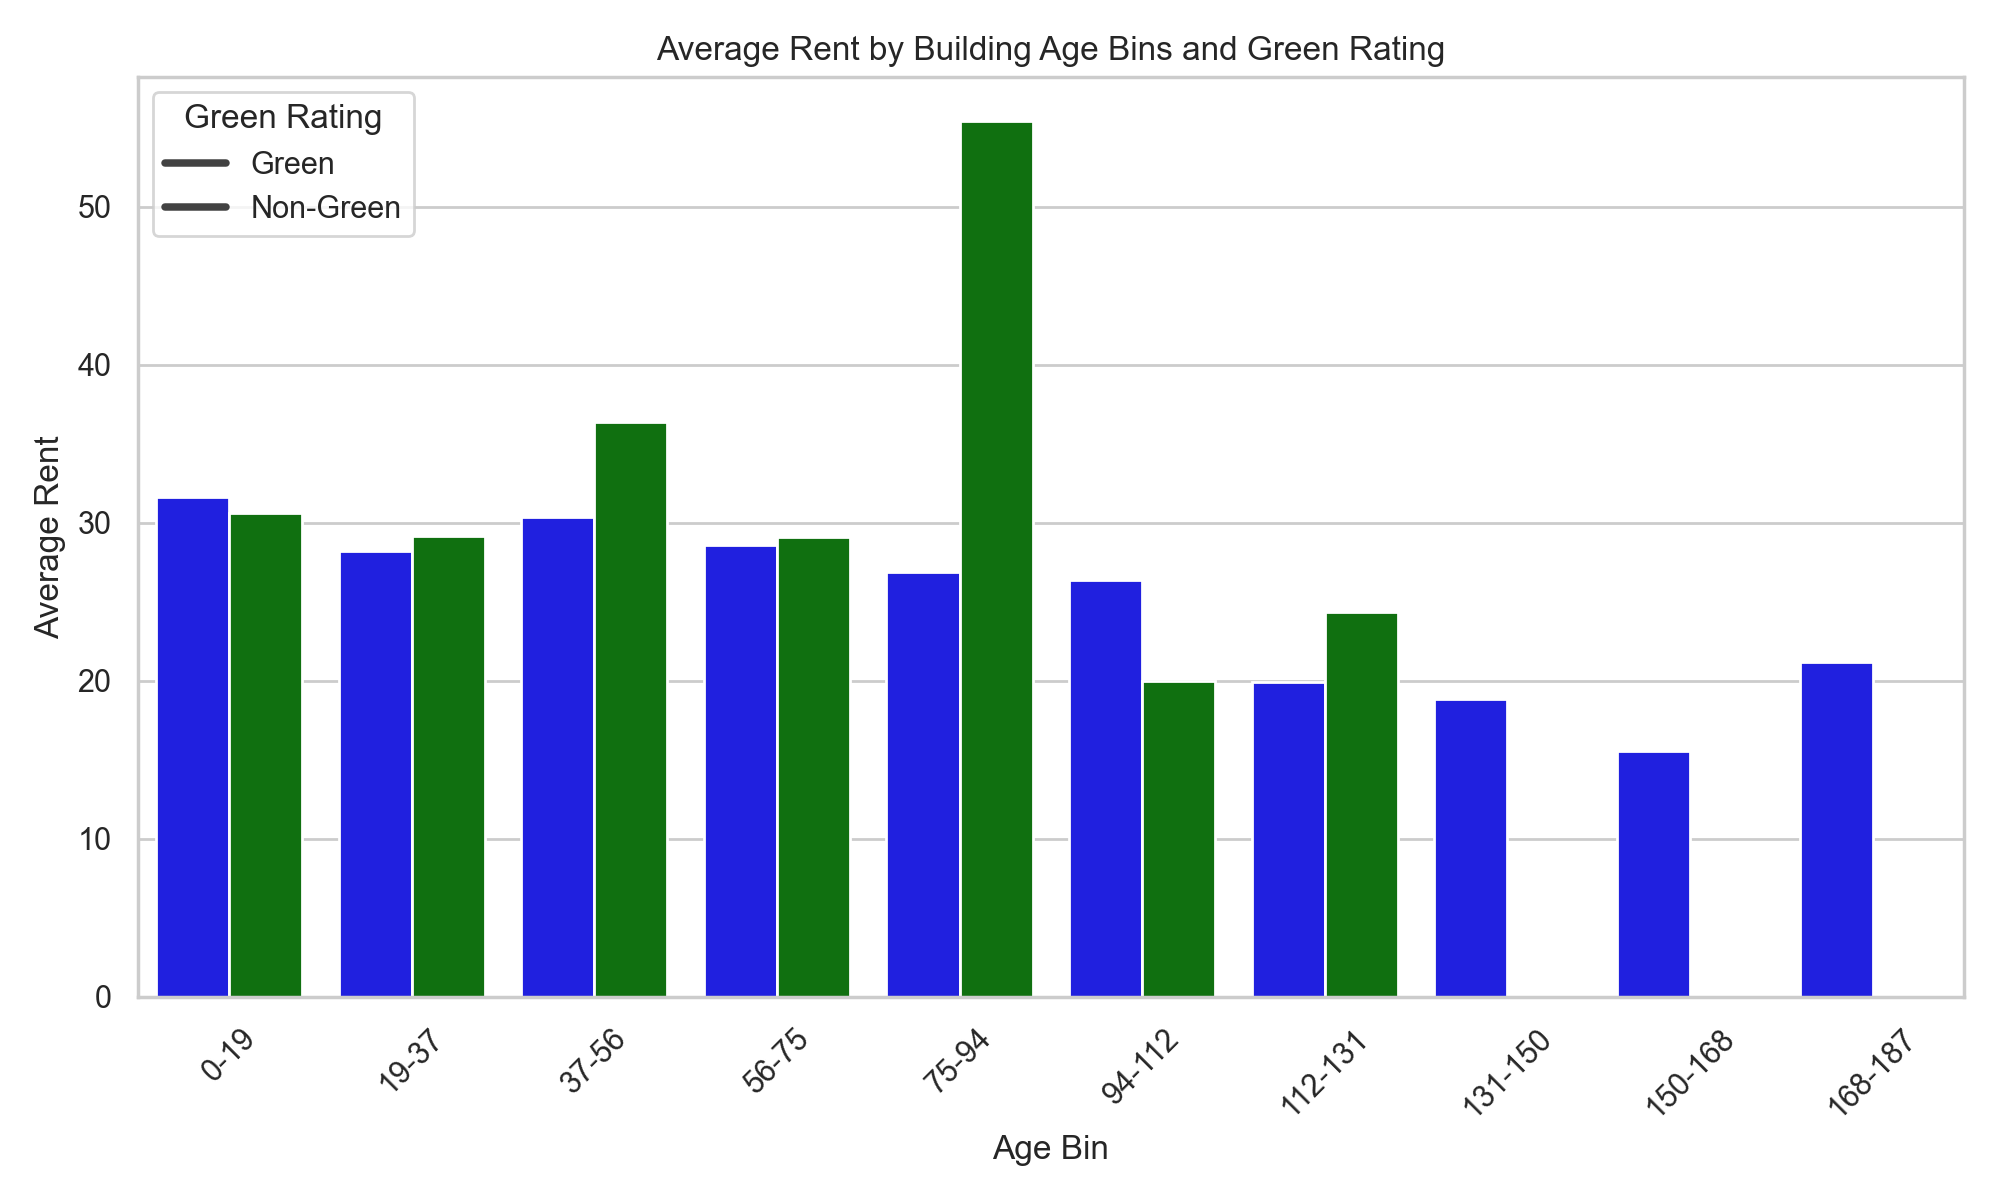

In [157]:
palette = {1: 'green', 0: 'blue'}

# Create a bar plot with different colors for green_rating
plt.figure(figsize=(10, 6))
sns.barplot(data=average_rents, x='age_bin', y='Rent', hue='green_rating', palette=palette)
plt.xlabel('Age Bin')
plt.ylabel('Average Rent')
plt.title('Average Rent by Building Age Bins and Green Rating')
plt.legend(title='Green Rating', labels=['Green', 'Non-Green'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

Analyzing average rent data for green and non-green buildings across age bins highlights the benefits of green investments.

In the 0-19 age range, non-green buildings have slightly higher average rent: 31.61 vs. 30.64 for green buildings.

Green buildings lead in the 19-37 age bin with an average rent of 29.14, surpassing non-green buildings at 28.20.

This trend continues as buildings age, with green buildings consistently outperforming non-green counterparts in average rent.

Notably, in the 75-94 age bin, green buildings command a significantly higher average rent of 55.43, compared to non-green buildings at 26.88.

Consider upfront costs, energy efficiency, and environmental impact when choosing green investments.

Overall, the analysis suggests green buildings tend to offer competitive or higher average rents over time, underscoring the financial benefits of sustainability-focused investments

***Considering Leasing Rate***

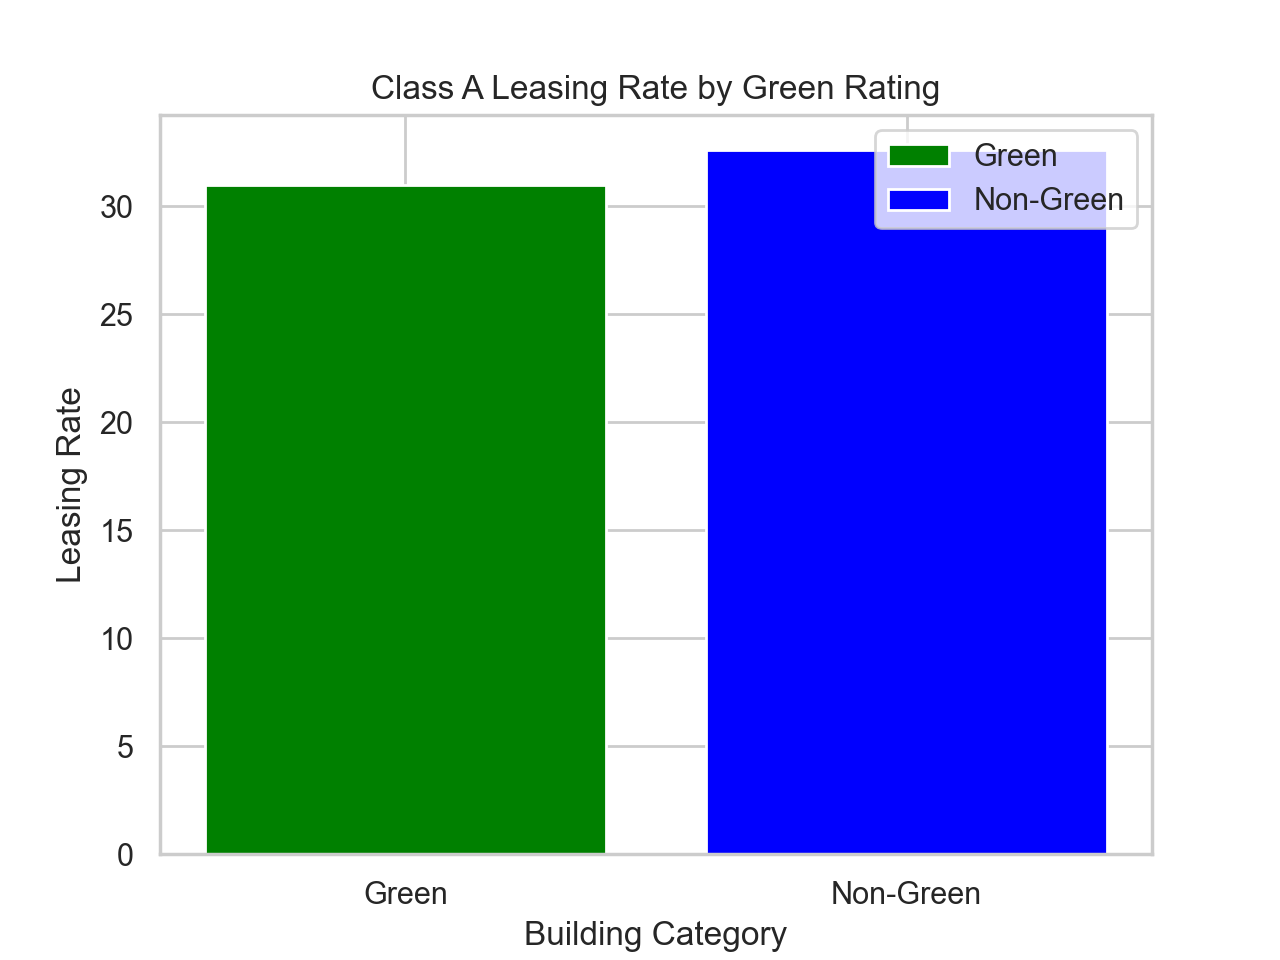

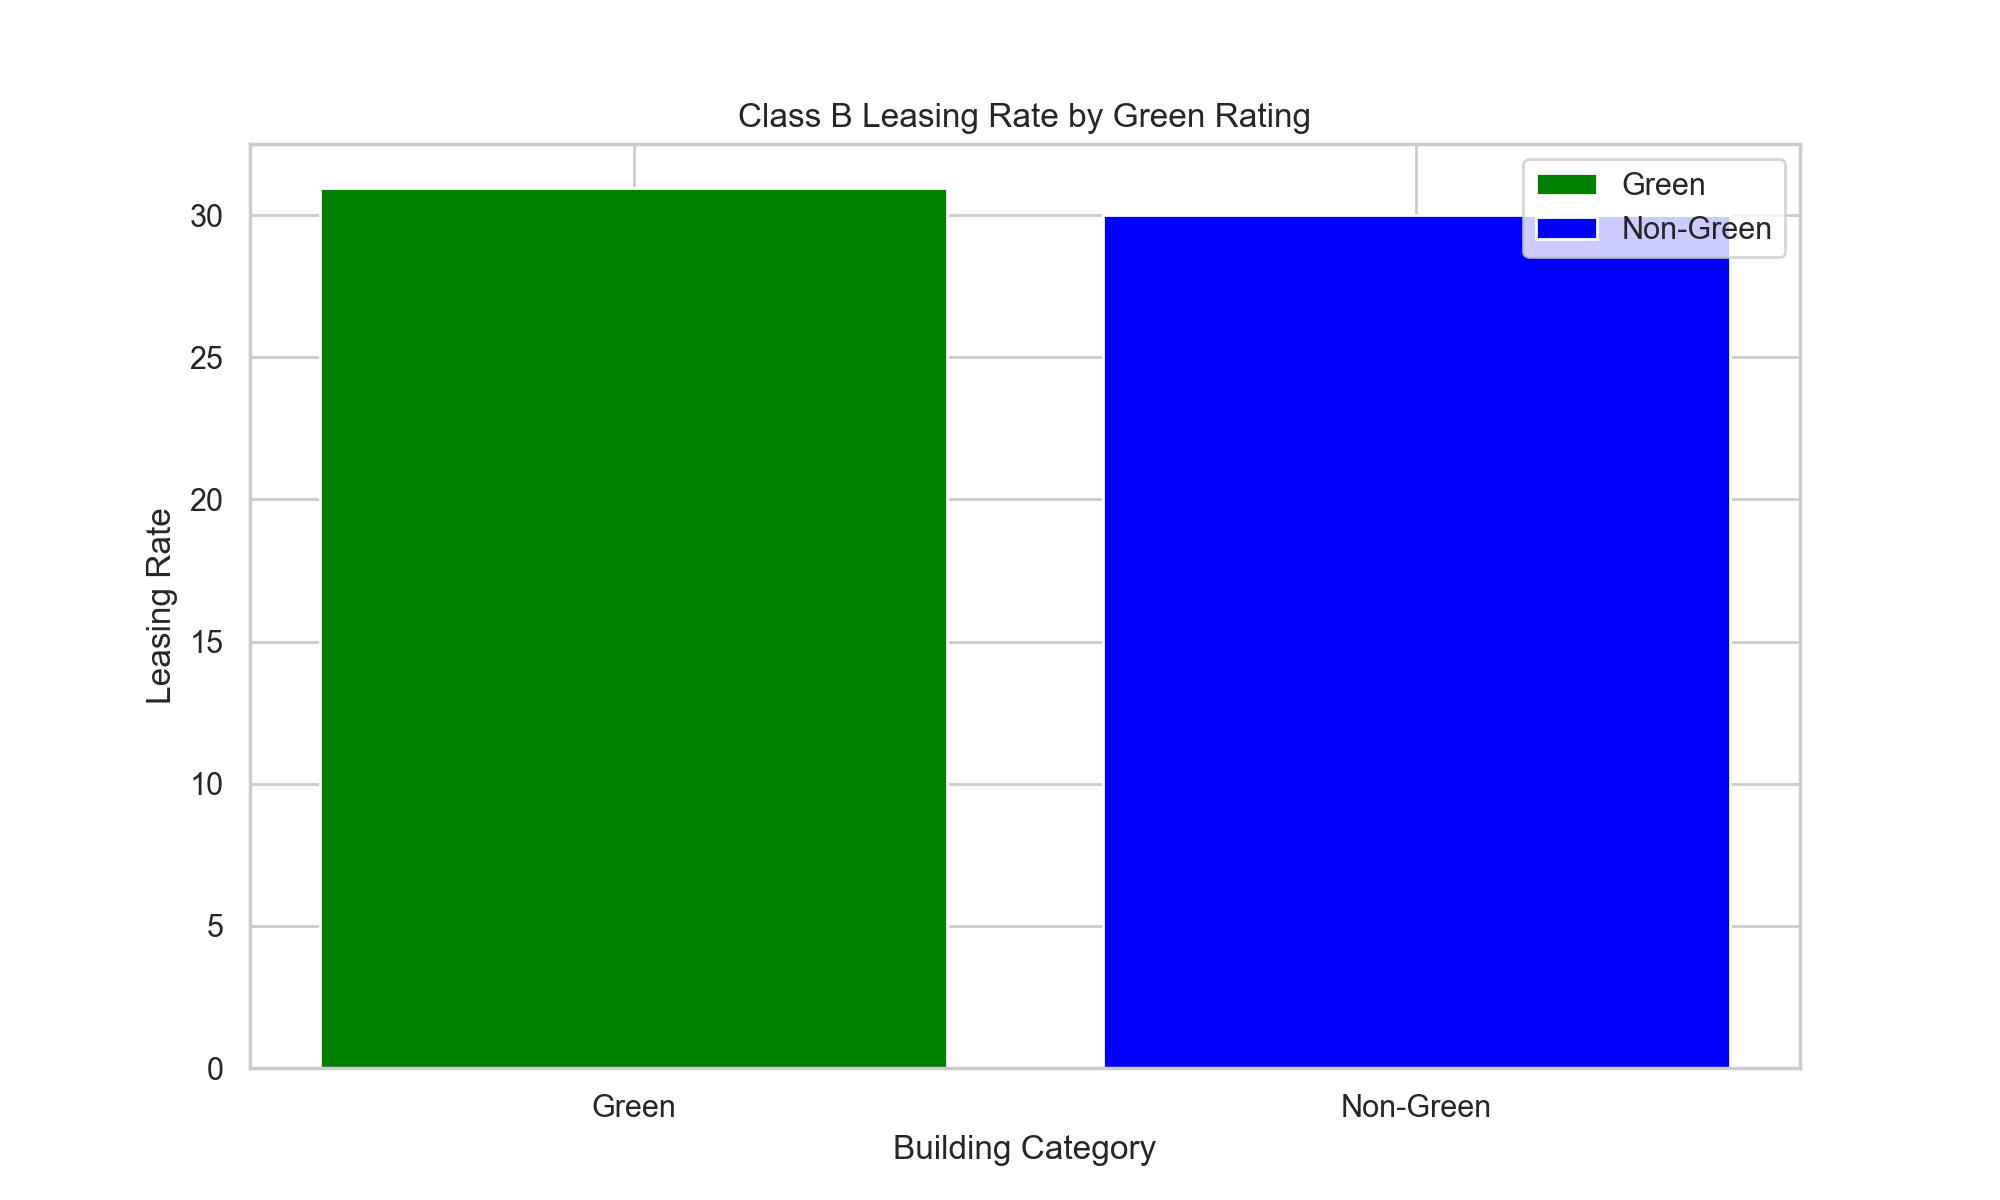

In [165]:
# Plot for Class A Green
plt.bar('Green', class_a_df[class_a_df['green_rating'] == 1]['Rent'].mean(), color='green', label='Green')
# Plot for Class A Non-Green
plt.bar('Non-Green', class_a_df[class_a_df['green_rating'] == 0]['Rent'].mean(), color='blue', label='Non-Green')

plt.xlabel('Building Category')
plt.ylabel('Leasing Rate')
plt.title('Class A Leasing Rate by Green Rating')
plt.legend()
plt.show()

# Plotting for Class B
plt.figure(figsize=(10, 6))

# Plot for Class B Green
plt.bar('Green', class_b_df[class_b_df['green_rating'] == 1]['Rent'].mean(), color='green', label='Green')
# Plot for Class B Non-Green
plt.bar('Non-Green', class_b_df[class_b_df['green_rating'] == 0]['Rent'].mean(), color='blue', label='Non-Green')

plt.xlabel('Building Category')
plt.ylabel('Leasing Rate')
plt.title('Class B Leasing Rate by Green Rating')
plt.legend()
plt.show()



The above analysis indicates that leasing rate for class A green buildings is lesser than class B buildings

***Conculsion*** 
So, according to our above analysis for variables classes, amenities, age of buildings and leasing rate, it is not advisable to real estate developer to invest in all green buildings

Real estate developer may proceed with investing in green buildings of Class B though since the rent is slightly higher from its non green counterparts and its leasing rate is also slightly higher

Real estate developer can make buildings without amenities since it will lower their cost of initial investment

In the long run yes, green buildings can yield good profits as seen in the Rent vs Building age graph above, though real estate developer will have to wait to see significant revenue and profit increase in this scenario

So, he can proceed with making few green buildings not all and this will help maintaining its reputation in market as well